![Python4Proteomics](images/logo_p4p.png) **(Python For Poteomics)**

# BEYOND: INTRODUCCIÓN A PYTEOMICS

En este apartado veremos como utilizar algunas herramientas del paquete [_**Pyteomics**_](https://pyteomics.readthedocs.io), un paquete de Python específico para trabajar con datos proteómicos.

---


**Índice:**

 * [I.- El paquete *Pyteomics*](#I.--El-paquete-Pyteomics)
 * [II.- Tratamiento de ficheros MGF](#II.--Tratamiento-de-ficheros-MGF)
 * [III.- Trabajando con masas](#III.--Trabajando-con-masas)

---


# I.- El paquete *Pyteomics*

<img src="images/beyond/pyteomics_logo.png" style="float: right; margin-left: 15px;" /> 

[_**Pyteomics**_](https://pyteomics.readthedocs.io) es un paquete de Python formado por una colección de herramientas versatiles, fiables, y bien documentas, que ayudan a trabajar con diferentes tipos de datos proteómicos.  
Pyteomics proporcionar módulos de código reutilizable que facilitan las tareas más comunes en el análisis de datos proteómico, tales como:
  * Cálculo de propiedades fisico-químicas básicas de los polipéptidos:
      * Masa y distribución isotópica.
      * Carga y pI.
      * Tiempo de retención.
  * Acceso a archivos comunes de datos en proteómica:
      * Datos de MS o LC-MS: archivos MGF, mzML, mzXML.
      * Bases de datos FASTA: lectura, escritura, generación de _decoys_.
      * Resultados de búsquedas proteómicas: archivos pepXML, X!Tandem, mzIdentML.
  * Estimación y filtrado de resultados por FDR.
  * Fácil manipulación de secuencias modificadas (tanto de péptidos como de proteinas).

## II.- Tratamiento de ficheros MGF

### Lectura de datos de espectros de masas

Para leer un fichero en [formato **MGF**](http://www.matrixscience.com/help/data_file_help.html#GEN) utilizaremos la función `read( )` del módulo *pyteomics.mgf* para ir obteniendo los diferentes espectros de masas del archivo MGF:
```python
mgf.read(source, convert_arrays=2, use_index=True)  ➞ IndexedMGF_or_MGF_object  ➞➞ dictionaries
```


📌 Algunos parámetros a destacar de esta función:
 * *source* : suele ser una _cadena de carácteres_ indicando el _nombre del fichero_ (y la localización) a ir leyendo (o, alternativamente, un objeto de tipo _input/output_ (entrada/salida o _io_) que actue como *source*).  
 * *convert_arrays* : ha de ser igual a `0`, `1` ó `2` (por _defecto_). Define el tipo de objeto contenedor de los datos de _carga_ (_z_), _masa/carga_ (_m/z_) e intensidad de los espectros: `0` para que sean listas estándard de Python; `1` ó `2` para que sean objetos de la clase **ndarray** de NumPy (el paquete _**numpy**_ deberá estar instalado en estos casos).
 * *use_index* : es un parámetro _booleano_ que permite definir el tipo de objeto devuelto por la función: `True` (por _defecto_) para que éste sea de la clase **IndexedMGF**, y por tanto los espectros puedan accederse rápidamente mediante diferentes _índices_; o `False` para que sea de la clase **MGF** (mucho más simple, sin posibilidad de usar múltiples indices, y más lento si se quiere acceder a los espectros por su único indice: el _título_). En ambos casos el objeto devuelto es _iterable_.

In [1]:
# Importamos el módulos `mgf` del paquete `pyteomics`:
from pyteomics import mgf

In [2]:
# Preparamos la localización (ruta + nombre de fichero) del fichero MGF a leer:
import os # Importamos el paquete os ("Operating System")

data_relpath = "data" # Ruta relativa del fichero MGF
mgf_filename = "acE25_rep1_fs01.mgf" # Nombre del fichero MGF

mgf_file = os.path.join(os.path.abspath(data_relpath), mgf_filename)
mgf_file

'C:\\Users\\Biomass\\Miniconda3\\P4P_Course\\data\\acE25_rep1_fs01.mgf'

El objeto devuelto por la función `mgf.read( )` (sea este de la tipo **IndexedMFG** o de tipo **MGF**) puede ser _iterado_ para ir obteniendo secuencialmente todos los espectros del archivo indicado:

In [3]:
# Obtenemos un objeto iterable utilizando mgf.read( ), pasándole un nombre de fichero (`mgf_file`):
spectra = mgf.read(mgf_file)

type(spectra)

pyteomics.mgf.IndexedMGF

Cada uno de los espectros que obtengamos a partir de éste objeto *iterable* será un diccionario, a través de cuyas _keys_ podremos acceder a toda la información disponible sobre dicho espectro en el archivo MGF:

In [4]:
# Obtenemos el siguiente espectro del objeto iterable `spectra` utilizando la 
# función `next( )` de Python (o, alternativamente el método `.next()` del propio objeto):
spectrum = next(spectra)

type(spectrum)

dict

In [5]:
spectrum.keys() # keys presentes en un diccionario de espectro:

dict_keys(['params', 'm/z array', 'intensity array', 'charge array'])

In [6]:
# La key 'params' permite acceder a un diccionario con meta-datos sobre el espectro:
spectrum['params']

{'search': 'MIS',
 'mass': 'Monoisotopic',
 'title': 'acE25_IAP-Ub_30_rep1.13256.13256.3 (intensity=494079543.7002)',
 'pepmass': (487.598859566511, None),
 'charge': [3],
 'scans': '13256',
 'rtinseconds': 9079.708 second}

In [7]:
# 📌 🔄 Utilizando el método `.next()` también obtenemos el siguiente espectro:
spectrum = spectra.next() 

spectrum['params']

{'search': 'MIS',
 'mass': 'Monoisotopic',
 'title': 'acE25_IAP-Ub_30_rep1.13339.13339.3 (intensity=494079543.7002)',
 'pepmass': (487.598859566511, None),
 'charge': [3],
 'scans': '13339',
 'rtinseconds': 9079.708 second}

### Representación gráfica de un espectro de masas

Utilizaremos el paquete _**matplotlib**_ para la representación gráfica de los datos de _intensidad_ y _masa/carga_ del espectro contenidos en las matrices (contenedores **ndarray** de NumPy) asociadas a las _keys_ `'intensity array'` y '`'m/z array'` de dicho espectro (diccionario `spectrum`):

In [8]:
# Importamos el módulo `pyplot` del paquete `matplotlib`:
import matplotlib.pyplot as plt

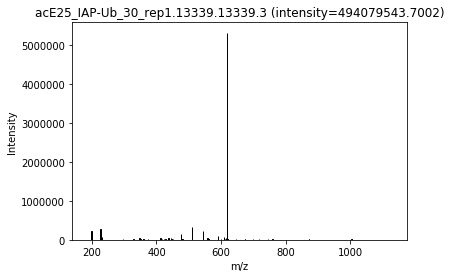

In [9]:
# Utilizamos un gráfico de barras para dibujar el espectro:
plt.bar(spectrum['m/z array'], # La key 'm/z array' referencía los valores de masa/carga de cada ión
        spectrum['intensity array'], # 'intensity array' referencía los valores de intensidad correspondientes
        edgecolor='black')

plt.title( spectrum['params']['title'] ) # Utilizamos el título del espectro como título del gráfico
plt.xlabel("m/z")
_ = plt.ylabel("Intensity")

### Inspección gráfica de los meta-datos de todos los espectros de masas de un MGF

Para cada espectro de masas contenido en el archivo MGF vamos a leer la _carga_, la _masa peptídica_ y el _tiempo de retención_ (_keys_ `'charge'`, `'pepmass'` y `'rtinseconds'` de diccionario de meta-datos asociado a la _key_ `'params'` del diccionario de cada espectro, que obtendremos al iterar el objeto devuelto por la función `mgf.read( )`):

In [10]:
# Volvemos a obtener un nuevo objeto iterable desde el inicio del fichero MGF:
spectra = mgf.read(mgf_file)

In [11]:
# 🔄 Alternativamente, podemos utilizar el método `.reset()` (valido tanto para los 
# objetos IndexedMGF como para los de tipo MGF), para que al iterador del objeto se
# rinicie:
spectra.reset() 

In [12]:
# Listas que contendrán los valores de los metadatos:
pep_zs = list() # Cargas (z)
pep_mzs = list() # Masa/Carga (m/z) correspondientes
pep_rts = list() # Tiempos de retención (RT) correspondientes

# Iteramos todos los espectros del archivo MGF:
for spectrum in spectra:
    params = spectrum['params'] # Metadatos del espectro actual (key 'params')
    # Añadimos los datos a la lista correspondiente:
    pep_zs.append( params['charge'][0] )
    pep_mzs.append( params['pepmass'][0] )
    pep_rts.append( params['rtinseconds'] )

#### Péptidos por cada valor de carga:

Para ésto, primero necesitamos calcular cuántos péptidos corresponden a cada valor de carga.  
Una manera rápida y sencilla de hacerlo es recurriendo a un objeto de la clase **Counter** (del paquete _**collections**_ de la _librería estándar_ de Python):

In [13]:
from collections import Counter

charge2counts = Counter(pep_zs) # Creamos un objeto de typo Counter a partir de la lista de cargas

charge2counts

Counter({3: 5928, 4: 2476, 2: 2398, 5: 907, 6: 399})

In [14]:
# 🔄 El uso de un objeto Counter sería equivalente a:

charge2counts = dict()
for z in pep_zs:
    charge2counts[z] = charge2counts.get(z, 0) + 1

charge2counts

{3: 5928, 4: 2476, 2: 2398, 5: 907, 6: 399}

Para observar gráficamente como se distribuyen los péptidos en base a su carga, lo mejor es un _histograma_:

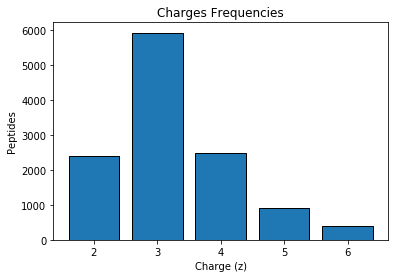

In [15]:
plt.bar(charge2counts.keys(), charge2counts.values(), edgecolor='black') # Cargas (`.keys()`) vs. cuentas (`.values()`)

plt.title("Charges Frequencies")
plt.xlabel('Charge (z)')
_ = plt.ylabel('Peptides')

#### Relación entre la masa y el tiempo de retención:

Primero hemos de calcular la masa de cada péptido (la lista `pep_masses`), a partir de su _masa/carga_ (`pep_mzs`) y su _carga_ (`pep_zs`):

In [16]:
pep_masses = list() # Lista que contendrá las masas (m) de los péptidos.
# Iteramos simultáneamente 2 listas (los valores de masa/carga y los de carga, para un mismo péptido),
# usando la función zip( ):
for mz, z in zip(pep_mzs, pep_zs):
    # Cálculo de la masa (m):
    m = (mz * z) - 1.008 * z # 1.008 → masa aproximada de un protón (H⁺)
    pep_masses.append(m)

Para observar gráficamente la relación entre la masa y el tiempo de retención, recurriremos a una _gráfica de disperción_:

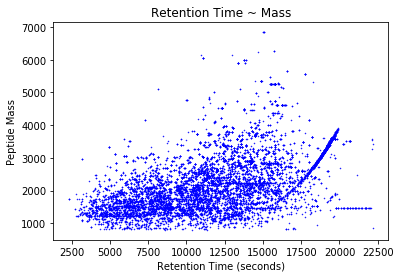

In [17]:
# Usando la función plt.plot( ) sin líneas entre marcadores:
plt.plot(pep_rts, pep_masses, 'b.', markersize=1) # 'b.' → 'b': blue, '.': tipo de marcador, nada: sin líneas entre marcadores

plt.title('Retention Time ~ Mass')
plt.xlabel('Retention Time (seconds)')
_ = plt.ylabel('Peptide Mass')

Si además queremos observar la relación entre la carga y la masa y el tiempo de retención (_3 variables_), podemos recurrir igualmente a una _gráfica de disperción_, pero utilizando en este caso la función `plt.scatter( )`, ya que nos permite colorear cada punto en función de una tercera variable, pasada como argumento del parámetro *c* (de _c_olor):

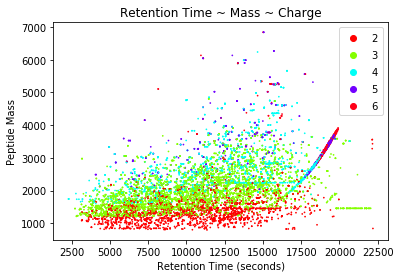

In [18]:
# Usando la función plt.scatter( ) :
scatter = plt.scatter(pep_rts, pep_masses, s=0.5, cmap='hsv', c=pep_zs) # `s`: tamaño del marcador; `c`: color de cada punto.

plt.title('Retention Time ~ Mass ~ Charge')
plt.xlabel('Retention Time (seconds)')
plt.ylabel('Peptide Mass')
_ = plt.legend( *scatter.legend_elements() ) # This should work with matplotlib 3.3.x

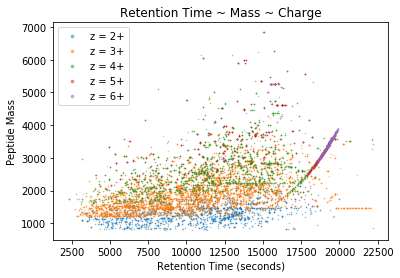

In [19]:
# 🔄 Alternativa para versiones de matplotlib < 0.3.3 :
for z_of_interest in sorted(charge2counts.keys()):
    # Listas que contendrán los valores de los metadatos:
    pep_masses_z = list() # Masas para péptidos con carga 5 (z=5)
    pep_rts_z = list() # Tiempos de retención (RT) correspondientes

    # Iteramos tres listas a la vez gracias a la función zip( ):
    for m, z, rt in zip(pep_masses, pep_zs, pep_rts):
        if z == z_of_interest: # Si la carga es igual a la carga elegida (`z_of_interest`):
            # Añadimos los datos a la lista correspondiente:
            pep_masses_z.append( m )
            pep_rts_z.append( rt )

    plt.plot(pep_rts_z, pep_masses_z, '.', markersize=1, alpha=0.5, label="z = " + str(z_of_interest))

plt.title("Retention Time ~ Mass ~ Charge")
plt.xlabel('Retention Time (seconds)')
plt.ylabel('Peptide Mass')
_ = plt.legend(markerscale=5)

O bien podemos ir filtrando los péptidos para una determinada carga, e ir graficando:

In [20]:
# Indicar la carga elegida:
z_of_interest = 5

# Listas que contendrán los valores de los metadatos:
pep_masses_z = list() # Masas para péptidos con carga 5 (z=5)
pep_rts_z = list() # Tiempos de retención (RT) correspondientes

# Filtrado de datos por carga (iteramos tres listas a la vez gracias a la función zip( )):
for m, z, rt in zip(pep_masses, pep_zs, pep_rts):
    if z == z_of_interest: # Si la carga es igual a la carga elegida (`z_of_interest`):
        # Añadimos los datos a la lista correspondiente:
        pep_masses_z.append( m )
        pep_rts_z.append( rt )

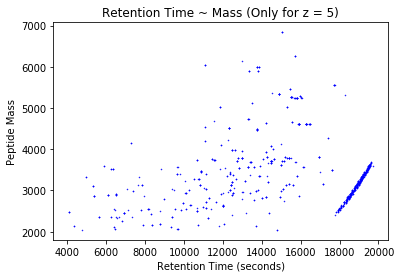

In [21]:
# Representación gráfica:
plt.plot(pep_rts_z, pep_masses_z, 'b.', markersize=1)

plt.title("Retention Time ~ Mass (Only for z = " + str(z_of_interest) + ")")
plt.xlabel('Retention Time (seconds)')
_ = plt.ylabel('Peptide Mass')

## III.- Trabajando con masas

Utilizaremos la función `calculate_mass( )` del módulo *pyteomics.mass* para obtener la _masa_ de aminoácidos, secuencias peptídicas, e incluso fórmnulas químicas:
```python
mass.calculate_mass(sequence_or_formula="", charge=0, average=False)  ➞ mass_as_a_float
```

📌 Algunos _**parámetros**_ a destacar de esta función:
 * *primer parámetro* : acepta como argumento una _cadena de carácteres_ que contenga una _secuéncia peptídica_ o una _fórmula química_. Generalmente la función identificará si se trata de una o de otra y devolverá la massa correctamente.  
   Sin embargo, existen _casos ambiguos_, que no permiten diferenciar si se trata de una secuéncia peptídica o una fórmula química. En estos casos, se puede indicar de qué se trata (_desambiguación_), anteponiendo al argumento pasado el nombre de parámetro *sequence* (para _secuencias peptídicas_) o *formula* (para _fórmulas químicas_).  
 * *charge* : puede pasarse como argumento de este parámetro un _número entero_ que indique la _carga_ de la _secuencia peptídica_, y así la función devuelva un valor de _masa/carga_ (_m/z_).  
   Por defecto su valor es `0`, devolviendose un valor de masa (_m_) y no de masa/carga.
 * *average* : es un parámetro _booleano_ que permite definir si se devuelve la _masa isotópica_, `False` (por _defecto_); o bien la _masa promedio_ `True`.

In [22]:
# Importamos el módulos `mass` del paquete `pyteomics`:
from pyteomics import mass

In [23]:
mass.calculate_mass('M') # AA (Metionina)

149.05104959669

In [24]:
mass.calculate_mass('MATYLDEGGK') # Secuencia peptídica (average=False → masa monoisotópica)

1083.4906609264299

In [25]:
mass.calculate_mass('MATYLDEGGK', average=True) # Secuencia peptídica (average=True → masa promedio)

1084.2019326116313

In [26]:
mass.calculate_mass('MATYLDEGGK', charge=2) # Secuencia peptídica (charge=2 → cálculo de masa/carga)

542.752606929985

In [27]:
mass.calculate_mass("H+") # Elemento químico (protón)

1.00727646677

In [28]:
mass.calculate_mass("C8H10N4O2") # Fórmula (cafeína)

194.08037557901997

In [29]:
mass.calculate_mass("HCOOH") # ¿Secuencia o fórmula? → Por defecto es considerada una secuencia peptídica

869.43302691101

In [30]:
mass.calculate_mass(formula="HCOOH") # Desambiguación → Forzamos a que sea interpretada como una fórmula química

46.00547930326

### Representación gráfica de masas/cargas de péptidos

Adicionalmente, el módulo *pyteomics.mass* posee algunas variables (_"atributos"_), como *mass*`.std_aa_mass` (un diccionario que asocia el código de una letra de cada [aminoacido proteogénico](https://en.wikipedia.org/wiki/Proteinogenic_amino_acid) a su masa menos 1 molécula de H₂O), que nos pueden resultar de utilidad para un pequeño experimento teórico:

In [31]:
aa2mass = mass.std_aa_mass # Diccionario aminoacido → (masa - H₂O)

print(len(aa2mass))
aa2mass

22


{'G': 57.02146,
 'A': 71.03711,
 'S': 87.03203,
 'P': 97.05276,
 'V': 99.06841,
 'T': 101.04768,
 'C': 103.00919,
 'L': 113.08406,
 'I': 113.08406,
 'N': 114.04293,
 'D': 115.02694,
 'Q': 128.05858,
 'K': 128.09496,
 'E': 129.04259,
 'M': 131.04049,
 'H': 137.05891,
 'F': 147.06841,
 'U': 150.95364,
 'R': 156.10111,
 'Y': 163.06333,
 'W': 186.07931,
 'O': 237.14773}

Para el experimento vamos a crearnos una función (`randompeps_sample_mzs( )`) que genere todos los posibles péptidos de la longitud que le indiquemos (parámetro *pep_length*), seleccione una muestra aleatoria del tamaño que le indiquemos (parámetro *sample_size*), y nos retorne su _masa/carga_ (parámetro *charge*):

In [32]:
import random # Módulo para la generación o selección de datos aleatorios.
from itertools import combinations_with_replacement as comb_w_rplc # Función de combinatoria,

In [33]:
AAs = aa2mass.keys() # Los códigos de 1 letra de los 22 aminoácidos proteogénicos.

def randompeps_sample_mzs(pep_length, charge=0, sample_size=None):
    # Combinatoria para generar los posibles péptidos de la longitud indicada (`pep_length`):
    population = tuple( comb_w_rplc(AAs, pep_length) )
    # Muestreo aleatorio (`sample_size`):
    sample = random.sample(population, sample_size or len(population))
    # Calcular m/z de la muestra:
    sample_mzs = list()
    for seq_aas in sample:
        seq_mz = mass.calculate_mass(sequence="".join(seq_aas), charge=charge)
        sample_mzs.append(seq_mz)
    return sample_mzs

Ahora utilizaremos la función `randompeps_sample_mzs( )` para generar 2 conjuntos de datos:

In [34]:
# 200.000 péptidos diferentes de 6 AAs y carga 2:
mzs_6aas_z2 = randompeps_sample_mzs(6, 2, 200000)

In [35]:
# 200.000 péptidos diferentes de 8 AAs y carga 3:
mzs_8aas_z3 = randompeps_sample_mzs(8, 3, 200000)

Y representaremos estos datos de _masa/carga_ en forma de histogramas, para estudiar su distribución:

In [36]:
import matplotlib.pyplot as plt

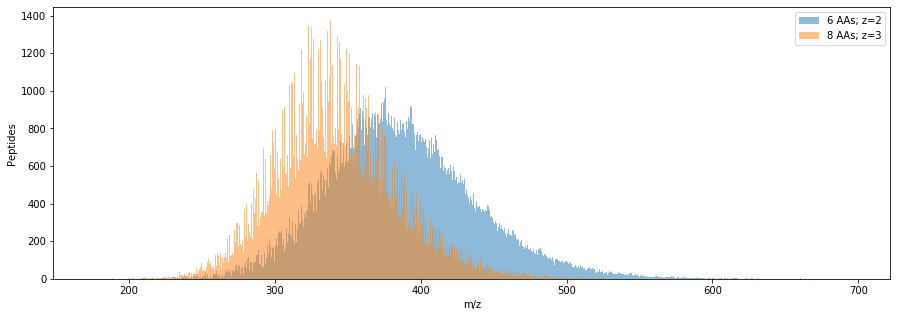

In [37]:
plt.figure( figsize=(15,5) )

plt.hist(mzs_6aas_z2, bins=1000, alpha=0.5, label='6 AAs; z=2')
plt.hist(mzs_8aas_z3, bins=1000, alpha=0.5, label='8 AAs; z=3')

plt.xlabel('m/z')
plt.ylabel('Peptides')
_ = plt.legend()

Y, si ampliamos el rango de _masa/carga_ entre 350 y 360, podemos observar la existencia de patrones de _"masa/cargas prohibidas"_ para los péptidos, en función de su longitud:

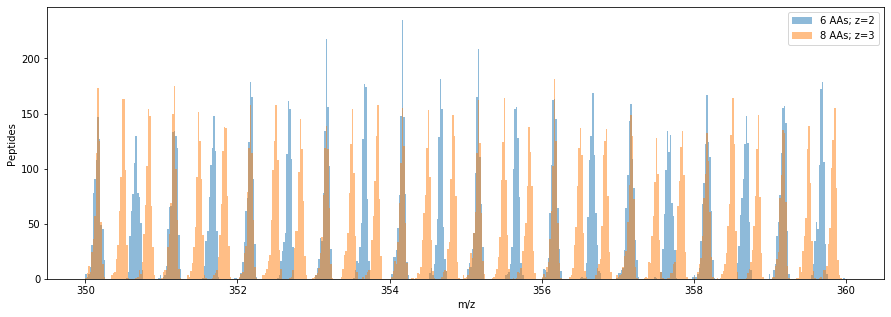

In [38]:
plt.figure( figsize=(15,5) )

# Zoom (uso del parámetro `range`):
plt.hist(mzs_6aas_z2, bins=500, range=(350, 360), alpha=0.5, label='6 AAs; z=2')
plt.hist(mzs_8aas_z3, bins=500, range=(350, 360), alpha=0.5, label='8 AAs; z=3')

plt.xlabel('m/z')
plt.ylabel('Peptides')
_ = plt.legend()